# Predicting customer buying behaviour

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

## Tasks

Explore and prepare the dataset
First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

Train a machine learning model
When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

Evaluate model and present findings
After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.

In [8]:
import pandas as pd
import numpy as np
import urllib.request
import plotly.express as px

In [5]:
# retrieve data
urllib.request.urlretrieve(url="https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv",
                           filename='../data/customer_booking.csv')

('../data/customer_booking.csv', <http.client.HTTPMessage at 0x2af738719f0>)

In [19]:
df = pd.read_csv('../data/customer_booking.csv', encoding='ISO-8859-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [20]:
df[['flight_day']].reset_index().groupby('flight_day').count()

,index
flight_day,
Fri,6761
Mon,8102
Sat,5812
Sun,6554
Thu,7424
Tue,7673
Wed,7674


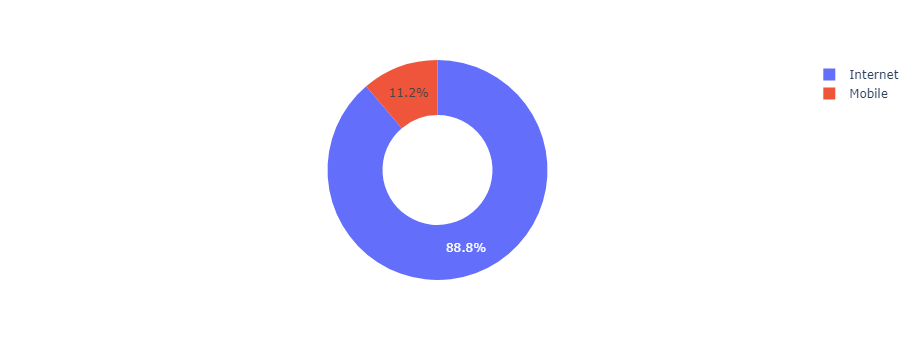

In [21]:
px.pie(data_frame=pd.DataFrame(df.sales_channel.value_counts()).reset_index(),
       names='index',
       values='sales_channel',
       hole=0.5)

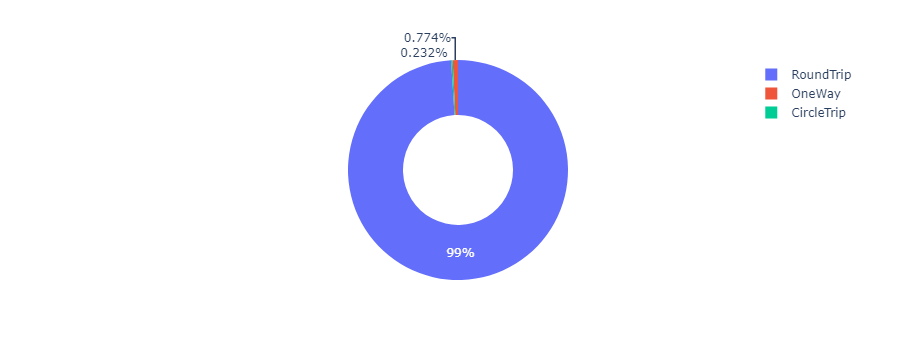

In [22]:
px.pie(data_frame=pd.DataFrame(df.trip_type.value_counts()).reset_index(),
       names='index',
       values='trip_type',
       hole=0.5)

In [23]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [24]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [25]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [27]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [28]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,4,PERPNH,Australia,0,1,0,5.62,0


In [32]:
df.sales_channel = pd.Categorical(df.sales_channel)
df.trip_type = pd.Categorical(df.trip_type)
df.route = pd.Categorical(df.route)
df.booking_origin = pd.Categorical(df.booking_origin)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         50000 non-null  int64   
 1   sales_channel          50000 non-null  category
 2   trip_type              50000 non-null  category
 3   purchase_lead          50000 non-null  int64   
 4   length_of_stay         50000 non-null  int64   
 5   flight_hour            50000 non-null  int64   
 6   flight_day             50000 non-null  int64   
 7   route                  50000 non-null  category
 8   booking_origin         50000 non-null  category
 9   wants_extra_baggage    50000 non-null  int64   
 10  wants_preferred_seat   50000 non-null  int64   
 11  wants_in_flight_meals  50000 non-null  int64   
 12  flight_duration        50000 non-null  float64 
 13  booking_complete       50000 non-null  int64   
dtypes: category(4), float64(1), int64(9)
m

In [34]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [36]:
df = sm.add_constant(df, prepend=False)

In [55]:
df1 = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('booking_complete', axis=1), 
                                                    df1.booking_complete, 
                                                    test_size=0.2,
                                                    random_state=42)

In [77]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40000, 10000, 40000, 10000)

In [81]:
y_train = np.array(y_train).reshape(-1, 1)

In [82]:
y_train

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [85]:
model = sm.OLS(y_train, X_train).fit()

In [87]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     8.773
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:05:02   Log-Likelihood:                -11942.
No. Observations:               40000   AIC:                         2.565e+04
Df Residuals:                   39115   BIC:                         3.326e+04
Df Model:                         884                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
nu

In [102]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,const
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1.0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1.0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1.0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1.0
49999,1,Internet,RoundTrip,19,6,10,4,PERPNH,Australia,0,1,0,5.62,0,1.0


In [101]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'const'],
      dtype='object')

In [104]:
df2 = df.drop(['sales_channel', 'trip_type', 'route', 'booking_origin'], axis=1)

In [105]:
df2.tail()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,const
49995,2,27,6,9,6,1,0,1,5.62,0,1.0
49996,1,111,6,4,7,0,0,0,5.62,0,1.0
49997,1,24,6,22,6,0,0,1,5.62,0,1.0
49998,1,15,6,11,1,1,0,1,5.62,0,1.0
49999,1,19,6,10,4,0,1,0,5.62,0,1.0


In [106]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('booking_complete', axis=1), 
                                                    df2.booking_complete, 
                                                    test_size=0.2,
                                                    random_state=42)

In [107]:
model = sm.OLS(y_train, X_train).fit()

In [108]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       booking_complete   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     92.31
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          3.34e-171
Time:                        17:14:17   Log-Likelihood:                -15148.
No. Observations:               40000   AIC:                         3.032e+04
Df Residuals:                   39990   BIC:                         3.040e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
num_passengers            0.00

In [146]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [171]:
clf = MLPClassifier(random_state=42, max_iter=1000, solver='adam', verbose=True, learning_rate_init=0.01)
clf = regr.fit(X_train, y_train)

In [172]:
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

Training set score: 0.850075
Test set score: 0.852000


In [161]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [165]:
clf

MLPClassifier(max_iter=500, random_state=42)

In [180]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'const'],
      dtype='object')

In [181]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,const
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1.0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1.0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1.0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1.0
49999,1,Internet,RoundTrip,19,6,10,4,PERPNH,Australia,0,1,0,5.62,0,1.0


In [192]:
df3 = df.copy()

In [194]:
df3.sales_channel = df3.sales_channel.map(dict(zip(df.sales_channel.unique(), np.arange(0,len(df.sales_channel.unique())))))

In [195]:
df3.trip_type = df3.trip_type.map(dict(zip(df.trip_type.unique(), np.arange(0,len(df.trip_type.unique())))))

In [196]:
df3.route = df3.route.map(dict(zip(df.route.unique(), np.arange(0,len(df.route.unique())))))

In [197]:
df3.booking_origin = df3.booking_origin.map(dict(zip(df.booking_origin.unique(), np.arange(0,len(df.booking_origin.unique())))))

In [204]:
df3 = df3.astype({"sales_channel": "int8", "trip_type": "int8", "route": "int8", "booking_origin": "int8"})

In [205]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('booking_complete', axis=1), 
                                                    df3.booking_complete, 
                                                    test_size=0.2,
                                                    random_state=42)

In [206]:
clf = MLPClassifier(random_state=42, max_iter=500, solver='adam', verbose=True)
clf = regr.fit(X_train, y_train)

In [207]:
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

Training set score: 0.850250
Test set score: 0.851900


In [209]:
clf.intercepts_

[array([ 1.00071090e-01,  6.23685875e-02, -5.91639075e-01,  2.90610560e-01,
         2.47031496e-01,  1.26460470e-01,  1.43611384e-01,  2.59400467e-02,
        -1.57949156e-01,  1.22950150e-01, -2.87271224e-01, -4.09991946e-01,
        -1.32486439e-01, -8.61024708e-02,  1.61852410e-01,  3.49202522e-01,
        -5.84538931e-01, -2.07405987e-01,  2.44879119e-02,  1.74507305e-01,
         1.83224930e-01, -1.47067668e-01, -3.22590256e-02, -1.38599665e-01,
         4.76924000e-02,  4.26731790e-01, -1.28787726e-01,  4.20002864e-01,
        -2.06304571e-02,  1.23611246e-01,  2.14122985e-02, -3.11071917e-01,
        -6.34598241e-02,  4.60218357e-02, -6.00244686e-02, -2.07957660e-01,
         1.23142115e-01, -1.23647045e-01, -2.95569236e-01,  2.08554996e-01,
         1.47380772e-01,  4.42524464e-02, -1.19616218e-02, -5.01192049e-01,
         1.18143797e-01, -2.94747236e-01, -5.08803912e-02,  3.76583522e-02,
         1.98594569e-01, -1.06724998e-01, -1.88171969e-01, -2.48120079e-01,
        -3.7

In [222]:
import seaborn as sns

<AxesSubplot:>

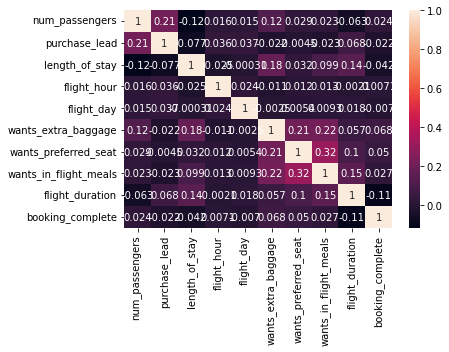

In [224]:
sns.heatmap(df2.drop('const', axis=1).corr(), annot=True)

In [238]:
df2.drop('const', axis=1).corr()[['booking_complete']].reset_index().sort_values(by='booking_complete', ascending=False).iloc[1::]

,index,booking_complete
5,wants_extra_baggage,0.068139
6,wants_preferred_seat,0.050116
7,wants_in_flight_meals,0.026511
0,num_passengers,0.024116
3,flight_hour,0.007127
4,flight_day,-0.006986
1,purchase_lead,-0.022131
2,length_of_stay,-0.042408
8,flight_duration,-0.106266


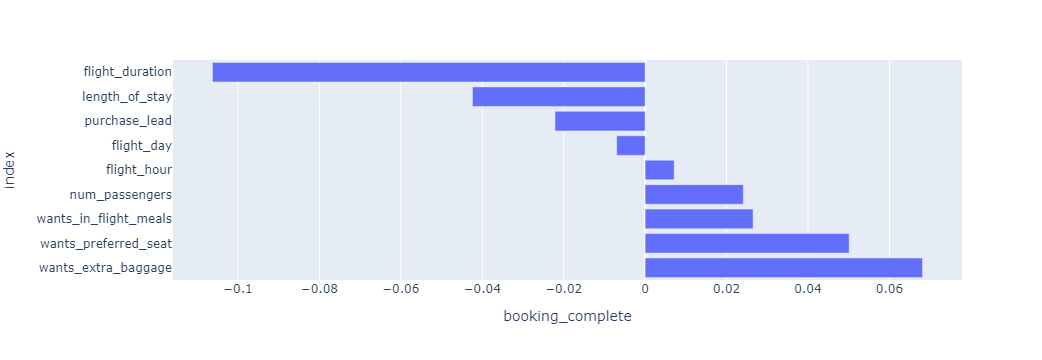

In [239]:
px.bar(data_frame=df2.drop('const', axis=1).corr()[['booking_complete']].reset_index().sort_values(by='booking_complete', ascending=False).iloc[1::], 
       y='index',
       x='booking_complete', orientation='h')